In [2]:
Train=False
Train=True

In [3]:
Train

True

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [6]:

data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


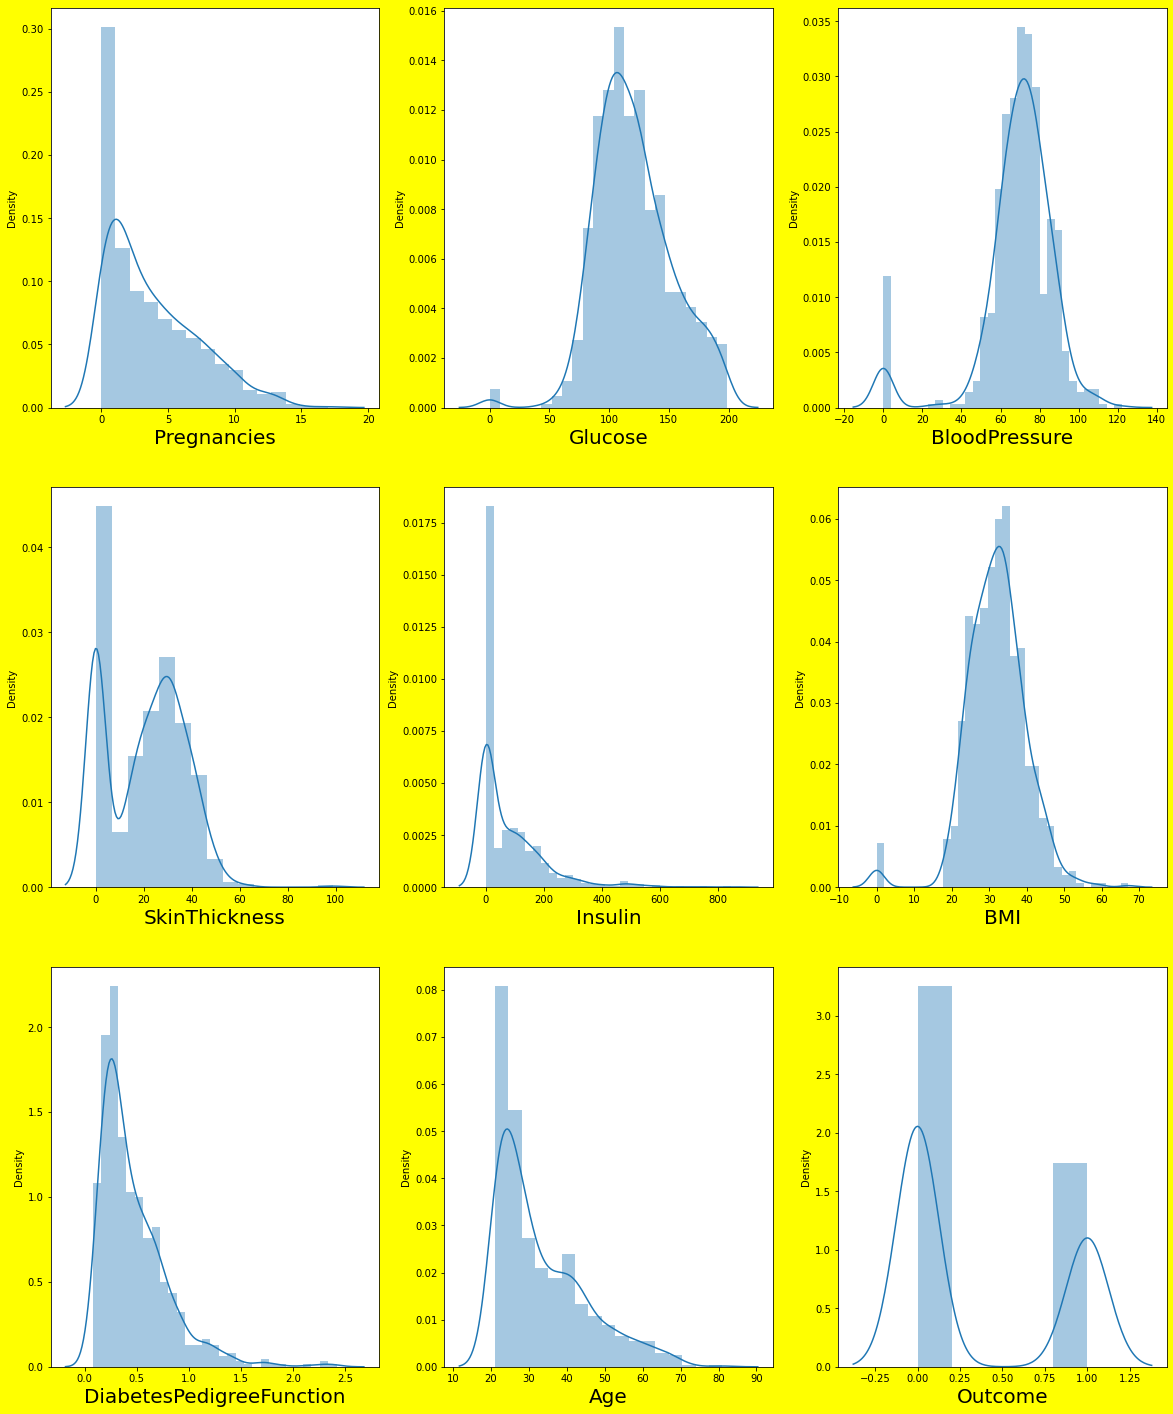

In [9]:
#Data processing-    exploratory data analysis(EDA)


plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data.columns:
    if plotnumber<= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [10]:
#replacing zero values with mean of the column

data['BMI'] =data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())


In [11]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

In [12]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

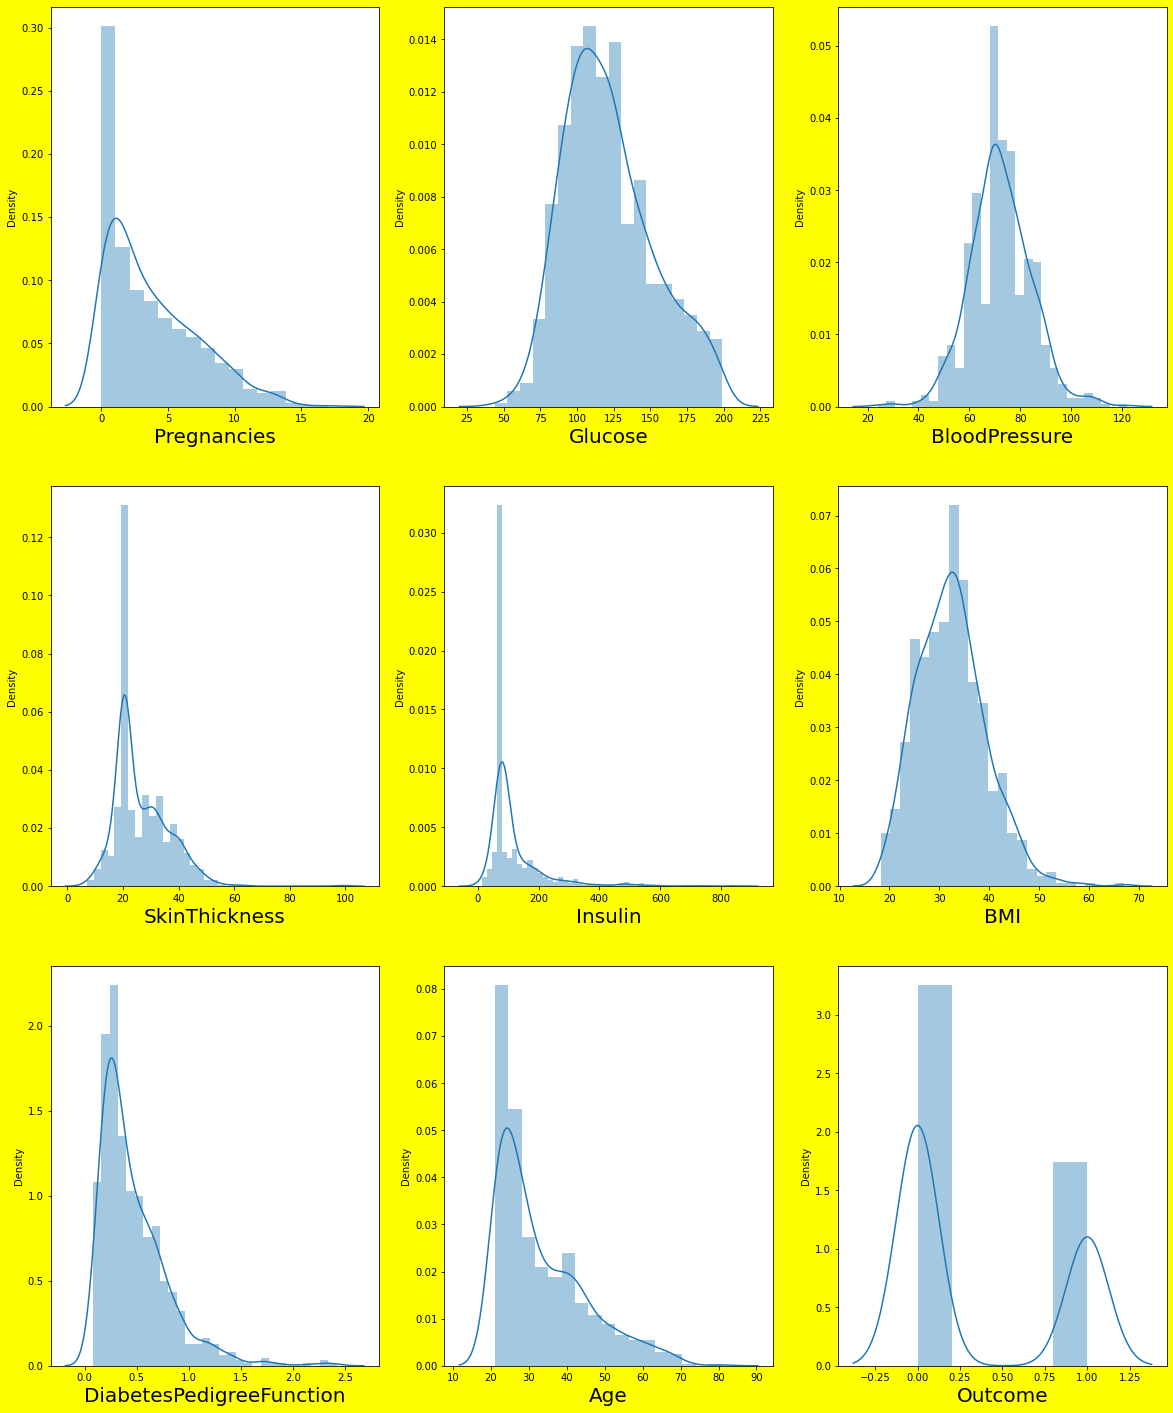

In [13]:
#lets see how updated data is distributed for every col


plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data.columns:
    if plotnumber<= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [14]:
#51 min A28Aug

In [15]:
df_features=data.drop('Outcome',axis=1)

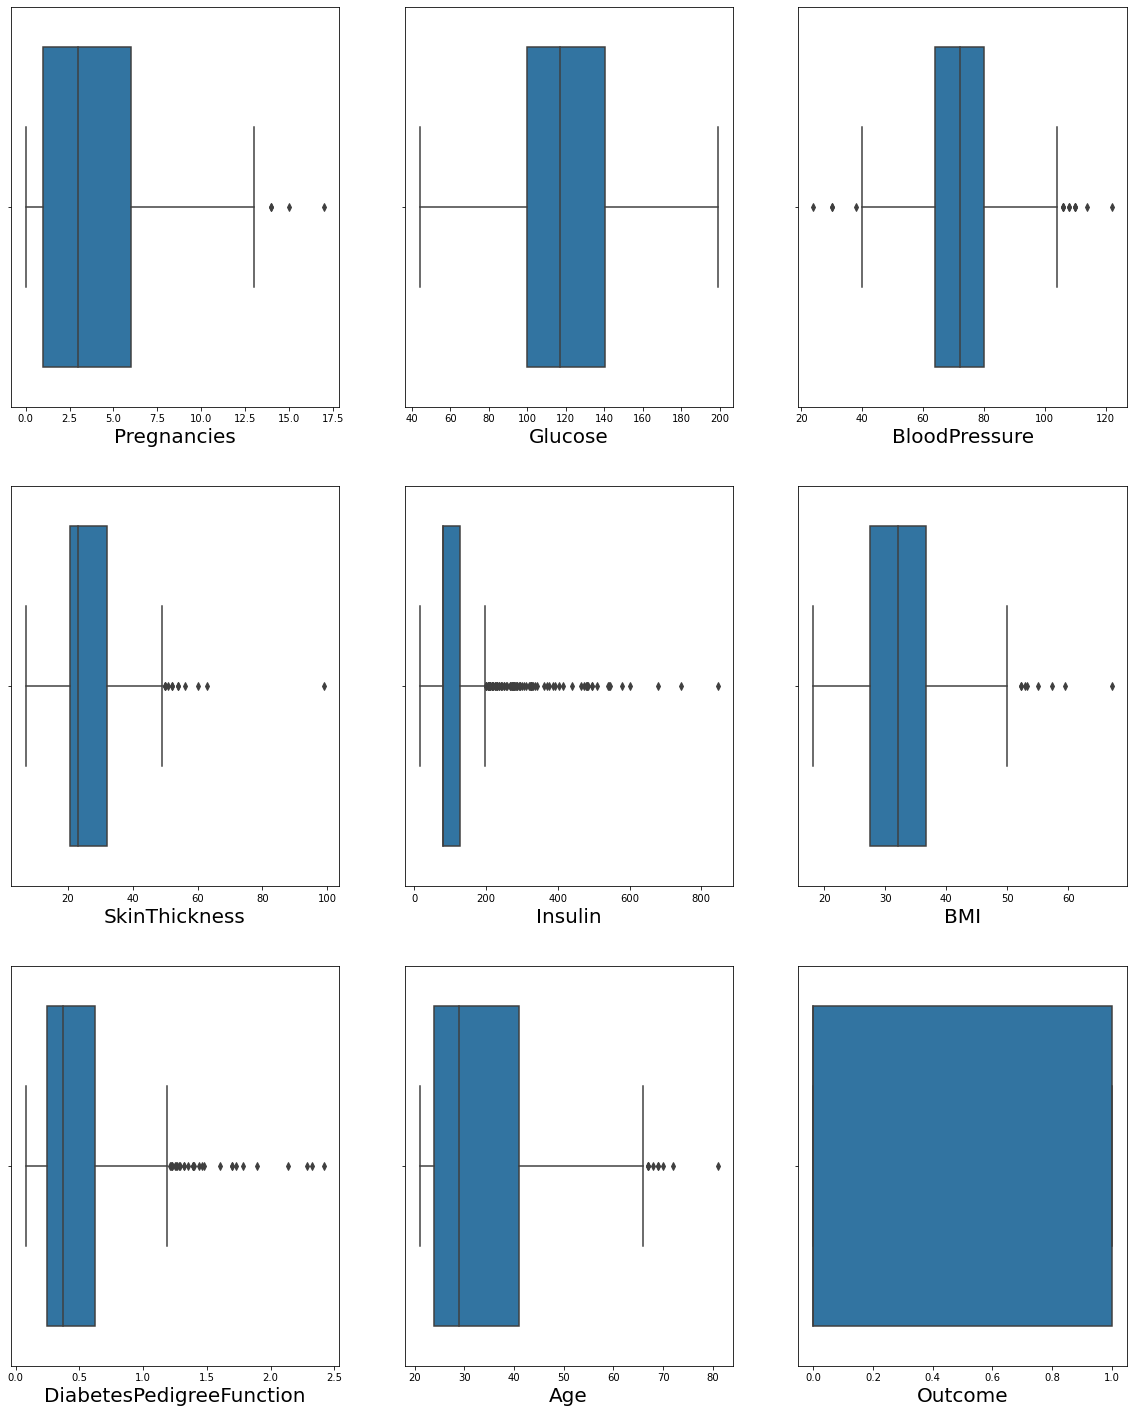

In [16]:
#lets visualise the outliers using boxplot
plt.figure(figsize=(20,25))
plotnumber=1
for column in data.columns:
    if plotnumber<= 9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [17]:
data.shape

(768, 9)

In [18]:
#finding the IQR(inter quantile range ) to identify outliers

#1st quantile Q1
q1=data.quantile(0.25)


#3rd quantile Q3
q1=data.quantile(0.75)

#IQR
iqr=q3=q1


In [19]:
q1

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

In [20]:
q3

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

# outliers detection Formula
##higher side=Q3+(1.5*iQR)


##Lower side= Q1-(1.5*iQR)


In [21]:
preg_high =q3.Pregnancies+(1.5*iqr.Pregnancies)

index_pos =np.where(data['Pregnancies']>preg_high )
index_pos 
data=data.drop(data.index[index_pos])

data.reset_index()


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
762,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
763,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
764,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
765,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
#bp 
bp_high =q3.BloodPressure+(1.5*iqr.BloodPressure)
print(bp_high)
index_pos =np.where(data['BloodPressure']>bp_high )
index_pos 
data=data.drop(data.index[index_pos])
print(data.shape)
data.reset_index()


#st
st_high =q3.SkinThickness+ (1.5*iqr.SkinThickness)
print(st_high)
index_pos =np.where(data['SkinThickness']>st_high )
index_pos 
data=data.drop(data.index[index_pos])
print(data.shape)

data.reset_index()

#BMI
bmi_high =q3.BMI+ (1.5*iqr.BMI)
print(bmi_high)
index_pos =np.where(data['BMI']>bmi_high )
index_pos 
data=data.drop(data.index[index_pos])
print(data.shape)

data.reset_index()



#DiabetesPedigreeFunction

dpf_high =q3.DiabetesPedigreeFunction+ (1.5*iqr.DiabetesPedigreeFunction)
print(dpf_high)
index_pos =np.where(data['DiabetesPedigreeFunction']>dpf_high )
index_pos 
data=data.drop(data.index[index_pos])
print(data.shape)

data.reset_index()



#Age
age_high =q3.Age+ (1.5*iqr.Age)
print(age_high)
index_pos =np.where(data['Age']>age_high )
index_pos 
data=data.drop(data.index[index_pos])
print(data.shape)

data.reset_index()


#bp  low
bp_low =q1.BloodPressure-(1.5*iqr.BloodPressure)
print(bp_low)
index_pos =np.where(data['BloodPressure']<bp_low )
index_pos 
data=data.drop(data.index[index_pos])
print(data.shape)
data.reset_index()

200.0
(767, 9)
80.0
(766, 9)
91.5
(766, 9)
1.5656249999999998
(756, 9)
102.5
(756, 9)
-40.0
(756, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
751,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
752,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
753,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
754,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
#1hr-11min----------

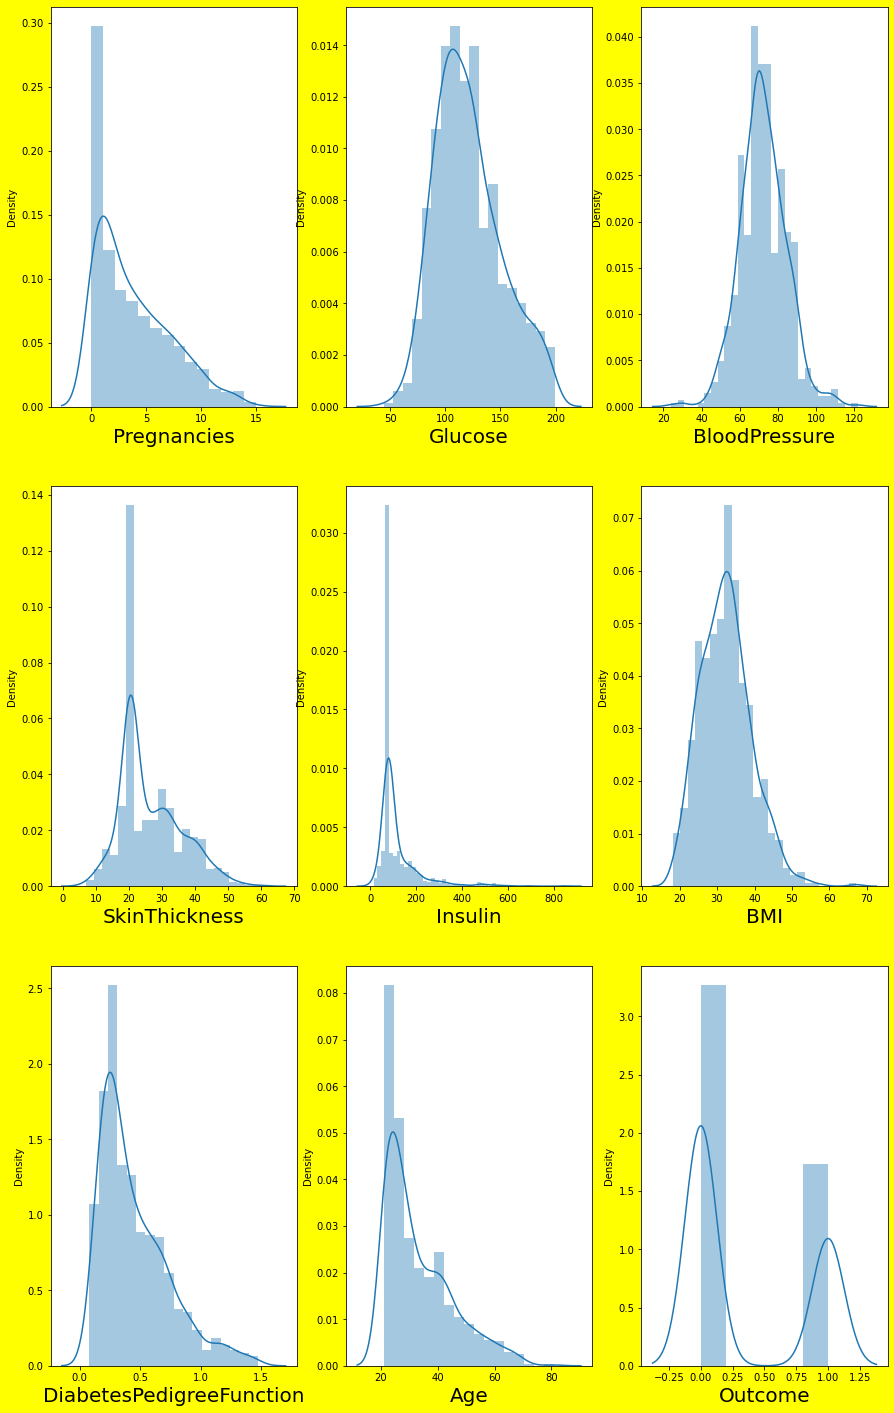

In [24]:
#updated distplpot

plt.figure(figsize=(15,25),facecolor='yellow')
plotnumber=1
for column in data.columns:
    if plotnumber<= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

# finding relationship.We want to keep only  only features having relationship with label 

In [25]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

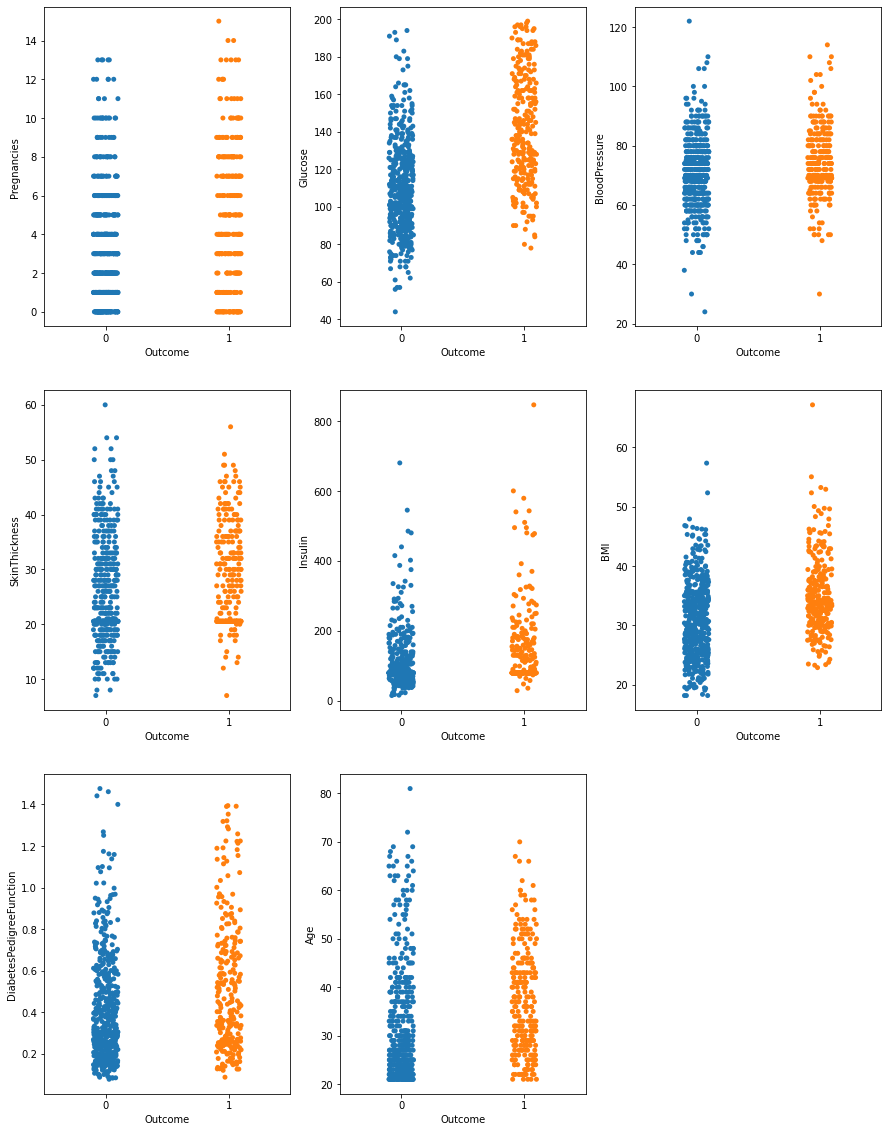

In [26]:
plt.figure(figsize=(15,20))
plotno=1
for column in X.columns:
    if plotno<=9:
        ax =  plt.subplot(3,3,plotno)
        sns.stripplot(y,X[column])
    plotno+=1

plt.show()        
    


In [27]:
##check multicollinearity-find if one feature is dependent on another

scalar=StandardScaler()
X_scaled =scalar.fit_transform(X)

In [28]:
X_scaled.shape


(756, 8)

In [29]:
#finding variance inflatiomn factor in each scaled column 
#ie, X_scaled.shape[1] (1/(1-R2))

In [30]:

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["features"]=X.columns

In [31]:
#lets check the values
vif

,vif,features
0,1.440019,Pregnancies
1,1.335922,Glucose
2,1.256514,BloodPressure
3,1.470781,SkinThickness
4,1.274095,Insulin
5,1.559279,BMI
6,1.031343,DiabetesPedigreeFunction
7,1.618610,Age


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.25,random_state=355 )

In [33]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [34]:
# lets see how well our model performs with test data

y_pred =log_reg.predict(x_test)
y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [35]:

#model Accuracy 
accuracy =accuracy_score (y_test,y_pred)    #order should be (Actual Vs pred )
accuracy


0.7671957671957672

In [36]:
#confusin matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat


array([[115,  11],
       [ 33,  30]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       126
           1       0.73      0.48      0.58        63

    accuracy                           0.77       189
   macro avg       0.75      0.69      0.71       189
weighted avg       0.76      0.77      0.75       189



In [38]:
# 0 means healthy and 1 means diabeteic

In [39]:
#Roc Curve
#fpr-falls positive rate  and tpr-true positive rate

fpr,tpr,thresholds = roc_curve(y_test,y_pred)
print('thresholds',thresholds)
print('false positive rate=',fpr)
print('true positive rate=',tpr)

thresholds [2 1 0]
false positive rate= [0.         0.08730159 1.        ]
true positive rate= [0.         0.47619048 1.        ]


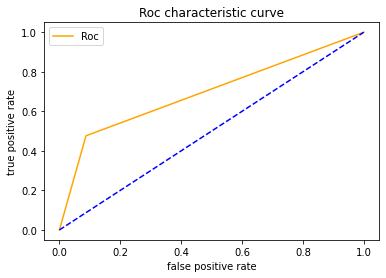

In [40]:
plt.plot(fpr,tpr,color='orange',label='Roc')   #in the order of x,y in inside
plt.plot([0,1],[0,1], color='blue', linestyle='--')   #the intial and end points of x and y in []



plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Roc characteristic curve')
plt.legend()
plt.show()

In [41]:
#how much area it is covered   AOC
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)


0.6944444444444445
